In [22]:
import pandas as pd
import numpy as np
from scipy.stats import *
from matplotlib import pyplot as plt
import itertools #스피어만 상관계수

In [41]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [119]:
df1=pd.read_csv('../매출액,금리,환율/금리,환율_전처리.csv',encoding='euc-kr',index_col='일자')
# df1.index = pd.to_datetime(df1.index)
df2=pd.read_csv('../매출액,금리,환율/당기순익_증가율.csv',encoding='euc-kr',index_col='결산년도')
df3=pd.read_csv('../주가데이터/DATA_FILE/kb금융.csv')
df4=pd.read_csv('../매출액,금리,환율/당기순익_z값.csv',encoding='euc-kr',index_col='결산년도')
dfzz=pd.read_csv('../매출액,금리,환율/z값순위.csv',encoding='euc-kr',index_col='분기')
df2

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,...,LG 화학전체대비증가율,NAVER전체대비증가율,SK 텔레콤전체대비증가율,삼성물산전체대비증가율,삼성바이오로직스전체대비증가율,삼성전자전체대비증가율,포스코 케미칼전체대비증가율,한국전력전체대비증가율,현대 모비스전체대비증가율,현대차전체대비증가율
결산년도,,,,,,,,,,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,...,-7.079360,-5.542947,49.510412,80.764526,2.133821,58.329418,22.898848,-88.353552,0.943682,-2.335253
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,...,79.649591,-7.978417,-0.430670,-50.721682,18.579416,-14.936187,-19.278011,198.653169,-14.101771,8.170924
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,...,-8.258576,-34.687157,-9.616856,-57.482422,17.274727,27.890675,-39.436162,-76.080124,-52.668756,-50.965371
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,...,-16.926806,16.566873,18.462716,10.443777,-52.776359,-8.075447,62.821646,316.742243,-9.337445,-6.535343
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,...,-20.258995,-2.535401,1.065079,-42.360595,85.899971,27.246224,26.672061,-170.311024,-117.203575,54.888513
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,...,51.598276,-22.455465,-6.908887,605.492342,-374.250307,-16.497451,-16.419524,69.526287,364.460450,-55.068417
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,...,-4.919073,89.035043,37.667589,-5.841960,64.054187,0.290975,7.714837,-260.896512,24.483610,16.621994
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,...,-49.256994,-95.231724,-4.684176,-48.531659,-57.965796,-0.422272,-3.616407,160.759187,-38.187564,-81.759099


<Figure size 720x432 with 0 Axes>

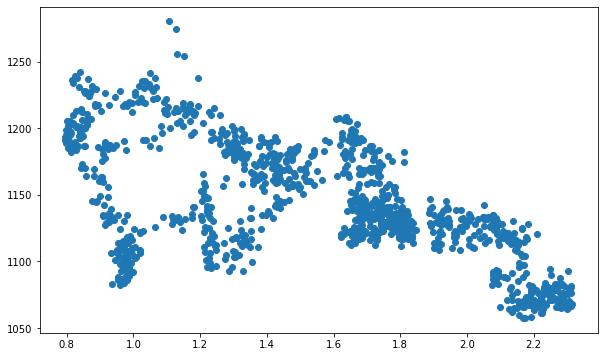

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df1['금리'],df1['달러환율'])

In [23]:
pearsonr(df1['금리'],df1['달러환율']) # 금리와 달러환율의 피어슨상관계수= -0.6
# p-value는 0에 수렴하므로 금리와 달려환율은 음의 상관관계를 갖는다

(-0.602283516878658, 1.6158918521604554e-116)

In [24]:
spearmanr(df1['금리'],df1['달러환율'])# 금리와 달러환율의 스피어만상관계수= -0.58
# p-value는 0에 수렴하므로 금리와 달려환율은 음의 상관관계를 갖는다

SpearmanrResult(correlation=-0.5761107543441976, pvalue=1.6794323292634816e-104)

In [121]:
total1,total2,total3,total4=0,0,0,0
len1,len2,len3,len4=0,0,0,0
gb=[]
for i in range(2016,2022):
    for n in range(len(df1.index)):
        if df1.index[n][0:4]==str(i):
            if df1.index[n][5:7] in ['01','02','03']:
                total1 += df1['금리'][n]
                len1 += 1
            elif df1.index[n][5:7] in ['04','05','06']:
                total2 += df1['금리'][n]
                len2 += 1
            elif df1.index[n][5:7] in ['07','08','09']:
                total3 += df1['금리'][n]
                len3 += 1
            elif df1.index[n][5:7] in ['10','11','12']:
                total4 += df1['금리'][n]
                len4 += 1
    if len1!=0:
        print(i,'년 1분기 평균 금리 : ',total1/len1)
        gb.append(total1/len1)
    else:
        print(i,'년 1분기는 데이터가 없습니다')
    if len2!=0:
        print(i,'년 2분기 평균 금리 : ',total2/len2)
        gb.append(total2/len2)
    else:
        print(i,'년 2분기는 데이터가 없습니다')
    if len3!=0:
        print(i,'년 3분기 평균 금리 : ',total3/len3)
        gb.append(total3/len3)
    else:
        print(i,'년 3분기는 데이터가 없습니다')
    if len4!=0:
        print(i,'년 4분기 평균 금리 : ',total4/len4)
        gb.append(total4/len4)
    else:
        print(i,'년 4분기는 데이터가 없습니다')
    total1,total2,total3,total4=0,0,0,0
    len1,len2,len3,len4=0,0,0,0

2016 년 1분기는 데이터가 없습니다
2016 년 2분기는 데이터가 없습니다
2016 년 3분기 평균 금리 :  1.2538064516129035
2016 년 4분기 평균 금리 :  1.5597968750000004
2017 년 1분기 평균 금리 :  1.6735967741935485
2017 년 2분기 평균 금리 :  1.6801333333333328
2017 년 3분기 평균 금리 :  1.7683125000000002
2017 년 4분기 평균 금리 :  2.098396551724138
2018 년 1분기 평균 금리 :  2.2432786885245912
2018 년 2분기 평균 금리 :  2.2061333333333333
2018 년 3분기 평균 금리 :  2.0287049180327865
2018 년 4분기 평균 금리 :  1.9268730158730156
2019 년 1분기 평균 금리 :  1.7993728813559324
2019 년 2분기 평균 금리 :  1.6432903225806446
2019 년 3분기 평균 금리 :  1.280444444444444
2019 년 4분기 평균 금리 :  1.4126984126984132
2020 년 1분기 평균 금리 :  1.2340161290322578
2020 년 2분기 평균 금리 :  0.9159672131147542
2020 년 3분기 평균 금리 :  0.8537656249999998
2020 년 4분기 평균 금리 :  0.9498064516129032
2021 년 1분기 평균 금리 :  1.0389166666666672
2021 년 2분기는 데이터가 없습니다
2021 년 3분기는 데이터가 없습니다
2021 년 4분기는 데이터가 없습니다


In [122]:
total1,total2,total3,total4=0,0,0,0
len1,len2,len3,len4=0,0,0,0
hb=[]
for i in range(2016,2022):
    for n in range(len(df1.index)):
        if df1.index[n][0:4]==str(i):
            if df1.index[n][5:7] in ['01','02','03']:
                total1 += df1['달러환율'][n]
                len1 += 1
            elif df1.index[n][5:7] in ['04','05','06']:
                total2 += df1['달러환율'][n]
                len2 += 1
            elif df1.index[n][5:7] in ['07','08','09']:
                total3 += df1['달러환율'][n]
                len3 += 1
            elif df1.index[n][5:7] in ['10','11','12']:
                total4 += df1['달러환율'][n]
                len4 += 1
    if len1!=0:
        print(i,'년 1분기 평균 달러환율 : ',total1/len1)
        hb.append(total1/len1)
    else:
        print(i,'년 1분기는 데이터가 없습니다')
    if len2!=0:
        print(i,'년 2분기 평균 달러환율 : ',total2/len2)
        hb.append(total2/len2)
    else:
        print(i,'년 2분기는 데이터가 없습니다')
    if len3!=0:
        print(i,'년 3분기 평균 달러환율 : ',total3/len3)
        hb.append(total3/len3)
    else:
        print(i,'년 3분기는 데이터가 없습니다')
    if len4!=0:
        print(i,'년 4분기 평균 달러환율 : ',total4/len4)
        hb.append(total4/len4)
    else:
        print(i,'년 4분기는 데이터가 없습니다')
    total1,total2,total3,total4=0,0,0,0
    len1,len2,len3,len4=0,0,0,0
hb

2016 년 1분기는 데이터가 없습니다
2016 년 2분기는 데이터가 없습니다
2016 년 3분기 평균 달러환율 :  1121.3725806451612
2016 년 4분기 평균 달러환율 :  1157.36875
2017 년 1분기 평균 달러환율 :  1154.277419354839
2017 년 2분기 평균 달러환율 :  1129.4266666666667
2017 년 3분기 평균 달러환율 :  1132.2375000000002
2017 년 4분기 평균 달러환율 :  1105.7155172413795
2018 년 1분기 평균 달러환율 :  1072.2868852459017
2018 년 2분기 평균 달러환율 :  1078.565
2018 년 3분기 평균 달러환율 :  1121.5918032786883
2018 년 4분기 평균 달러환율 :  1127.5206349206353
2019 년 1분기 평균 달러환율 :  1125.084745762712
2019 년 2분기 평균 달러환율 :  1165.9145161290319
2019 년 3분기 평균 달러환율 :  1193.2380952380954
2019 년 4분기 평균 달러환율 :  1175.8095238095239
2020 년 1분기 평균 달러환율 :  1193.6000000000001
2020 년 2분기 평균 달러환율 :  1220.8114754098358
2020 년 3분기 평균 달러환율 :  1188.5375
2020 년 4분기 평균 달러환율 :  1117.6435483870966
2021 년 1분기 평균 달러환율 :  1114.0516666666667
2021 년 2분기는 데이터가 없습니다
2021 년 3분기는 데이터가 없습니다
2021 년 4분기는 데이터가 없습니다


[1121.3725806451612,
 1157.36875,
 1154.277419354839,
 1129.4266666666667,
 1132.2375000000002,
 1105.7155172413795,
 1072.2868852459017,
 1078.565,
 1121.5918032786883,
 1127.5206349206353,
 1125.084745762712,
 1165.9145161290319,
 1193.2380952380954,
 1175.8095238095239,
 1193.6000000000001,
 1220.8114754098358,
 1188.5375,
 1117.6435483870966,
 1114.0516666666667]

In [123]:
df2['평균금리']=gb

In [124]:
df2['평균환율']=hb

In [125]:
df2.index=['16-3','16-4','17-1','17-2','17-3','17-4','18-1','18-2','18-3','18-4','19-1','19-2','19-3','19-4','20-1','20-2','20-3','20-4','21-1']
df2.index.name='분기'
df4.index=['16-3','16-4','17-1','17-2','17-3','17-4','18-1','18-2','18-3','18-4','19-1','19-2','19-3','19-4','20-1','20-2','20-3','20-4','21-1']
df4.index.name='분기'

<Figure size 720x432 with 0 Axes>

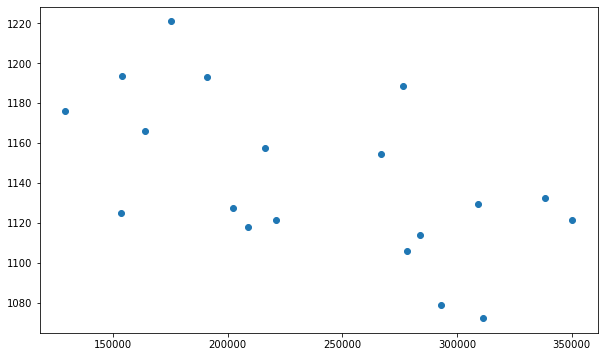

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df2['합'],df2['평균환율'])

In [12]:
print('당기순익 전체합과 평균 환율의 상관계수는',pearsonr(df2['합'],df2['평균환율'])[0],'이고 p-value는',\
      pearsonr(df2['합'],df2['평균환율'])[1],'이다')

당기순익 전체합과 평균 환율의 상관계수는 -0.5687147246853488 이고 p-value는 0.011055869650186467 이다


In [13]:
spearmanr(df2['합'],df2['평균금리'])
spearmanr(df2['합'],df2['평균환율'])

SpearmanrResult(correlation=0.431578947368421, pvalue=0.06502990156827808)

SpearmanrResult(correlation=-0.5701754385964912, pvalue=0.010805454127075677)

In [38]:
df2.index=['16-3','16-4','17-1','17-2','17-3','17-4','18-1','18-2','18-3','18-4','19-1','19-2','19-3','19-4','20-1','20-2','20-3','20-4','21-1']
df2.index.name='분기'
list1,list2,list3=[],[],[]
for i in range(1,19):
    l=list(df2.iloc[i,26:])
    l.sort(reverse=True)
    print(l[0:3])
    for x in range(3):
        for n in range(1,19):
            for a in range(26,38):
                if df2.iloc[n,a] == l[x]:
                    print(df2.columns[a])
                    if x==0:
                        list1.append(df2.columns[a][:-7])
#                         list1.append(a)
                    elif x==1:
                        list2.append(df2.columns[a][:-7])
#                         list2.append(a)
                    else:
                        list3.append(df2.columns[a][:-7])
#                         list3.append(a)


[80.76452618220237, 58.32941787036238, 49.51041190878146]
삼성물산전체대비증가율
삼성전자전체대비증가율
SK 텔레콤전체대비증가율
[198.6531691183413, 145.65108161377572, 79.64959130081]
한국전력전체대비증가율
LG 생활건강전체대비증가율
LG 화학전체대비증가율
[27.890674971416654, 17.274727033734308, -2.765021689527716]
삼성전자전체대비증가율
삼성바이오로직스전체대비증가율
KB 금융전체대비증가율
[316.74224312674204, 62.82164610047491, 18.46271635173856]
한국전력전체대비증가율
포스코 케미칼전체대비증가율
SK 텔레콤전체대비증가율
[85.89997146516076, 54.88851262241117, 27.246223895685528]
삼성바이오로직스전체대비증가율
현대차전체대비증가율
삼성전자전체대비증가율
[605.4923423468168, 364.46044970603015, 127.63812525502765]
삼성물산전체대비증가율
현대 모비스전체대비증가율
LG 생활건강전체대비증가율
[89.03504274296381, 64.05418660175314, 37.66758895332246]
NAVER전체대비증가율
삼성바이오로직스전체대비증가율
SK 텔레콤전체대비증가율
[160.75918696234018, -0.4222717891595096, -3.6164069422403298]
한국전력전체대비증가율
삼성전자전체대비증가율
포스코 케미칼전체대비증가율
[1317.47001861843, 283.6509768358753, 123.5713831408472]
삼성바이오로직스전체대비증가율
삼성물산전체대비증가율
NAVER전체대비증가율
[593.1352957920674, 362.7212305654028, 146.87868777110629]
현대차전체대비증가율
KB 금융전체대비증가율
LG 생활건강전체대비증가율
[59.5498

In [39]:
df5=pd.DataFrame({'1st':list1,'2nd':list2,'3rd':list3},index=df2.index[1:])
df5

,1st,2nd,3rd
분기,,,
16-4,삼성물산,삼성전자,SK 텔레콤
17-1,한국전력,LG 생활건강,LG 화학
17-2,삼성전자,삼성바이오로직스,KB 금융
17-3,한국전력,포스코 케미칼,SK 텔레콤
17-4,삼성바이오로직스,현대차,삼성전자
18-1,삼성물산,현대 모비스,LG 생활건강
18-2,NAVER,삼성바이오로직스,SK 텔레콤
18-3,한국전력,삼성전자,포스코 케미칼
18-4,삼성바이오로직스,삼성물산,NAVER


In [11]:
df2

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,...,SK 텔레콤전체대비증가율,삼성물산전체대비증가율,삼성바이오로직스전체대비증가율,삼성전자전체대비증가율,포스코 케미칼전체대비증가율,한국전력전체대비증가율,현대 모비스전체대비증가율,현대차전체대비증가율,평균금리,평균환율
분기,,,,,,,,,,,,,,,,,,,,,
16-3,5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.253806,1121.372581
16-4,4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,...,49.510412,80.764526,2.133821,58.329418,22.898848,-88.353552,0.943682,-2.335253,1.559797,1157.368750
17-1,8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,...,-0.430670,-50.721682,-65.280233,-14.936187,-19.278011,198.653169,-14.101771,8.170924,1.673597,1154.277419
17-2,10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,...,-9.616856,-57.482422,-49.190530,27.890675,-39.436162,-76.080124,-52.668756,-50.965371,1.680133,1129.426667
17-3,8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,...,18.462716,10.443777,34.101469,-8.075447,62.821646,316.742243,-9.337445,-6.535343,1.768313,1132.237500
17-4,5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,...,1.065079,-42.360595,-50.377631,27.246224,26.672061,-170.311024,-117.203575,54.888513,2.098397,1105.715517
18-1,9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,...,-6.908887,605.492342,350.502168,-16.497451,-16.419524,-93.274426,-388.208589,-55.068417,2.243279,1072.286885
18-2,9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,...,37.667589,-5.841960,-52.434036,0.290975,7.714837,272.516662,24.483610,16.621994,2.206133,1078.565000
18-3,9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,...,-4.684176,-48.531659,18.957281,-0.422272,-3.616407,-199.767702,-38.187564,-81.759099,2.028705,1121.591803


In [27]:
pearsonr(df4['1st'],df2['합'].iloc[1:])

(0.10759593331999089, 0.670868564874289)

In [144]:
z=[]
for i in range(len(df4.index)):
    m=max(df4.iloc[i])
    for n in df4.columns:
        if df4[n][i]==m:
            z.append(n[:-2])
z

['한국전력',
 '현대 모비스',
 '현대 모비스',
 '삼성전자',
 '한국전력',
 '삼성전자',
 '삼성전자',
 'SK 텔레콤',
 'SK 텔레콤',
 '삼성바이오로직스',
 'LG 생활건강',
 '현대 모비스',
 'LG 생활건강',
 '삼성바이오로직스',
 'LG 생활건강',
 'KB 금융',
 'KB 금융',
 'NAVER',
 'LG 화학']

<BarContainer object of 19 artists>

Text(0.5, 1.0, '전체합과 금리')

(0.7, 2.3)

Text(16-3, 221012.0, '한국전력\n현대 모비스')

Text(16-4, 216296.0, '현대 모비스\n현대차')

Text(17-1, 266802.0, '현대 모비스\n현대차')

Text(17-2, 309378.0, '삼성전자\nLG 화학')

Text(17-3, 338266.0, '한국전력\nSK 텔레콤')

Text(17-4, 278186.0, '삼성전자\n현대차')

Text(18-1, 311218.0, '삼성전자\nSK 텔레콤')

Text(18-2, 293136.0, 'SK 텔레콤\nNAVER')

Text(18-3, 350310.0, 'SK 텔레콤\n삼성전자')

Text(18-4, 202182.0, '삼성바이오로직스\n삼성물산')

Text(19-1, 153706.0, 'LG 생활건강\n포스코 케미칼')

Text(19-2, 164088.0, '현대 모비스\nKB 금융')

Text(19-3, 190846.0, 'LG 생활건강\n포스코 케미칼')

Text(19-4, 129148.0, '삼성바이오로직스\n현대 모비스')

Text(20-1, 153756.0, 'LG 생활건강\n삼성물산')

Text(20-2, 175492.0, 'KB 금융\nLG 생활건강')

Text(20-3, 276564.0, 'KB 금융\n한국전력')

Text(20-4, 208716.0, 'NAVER\n삼성바이오로직스')

Text(21-1, 284003.0, 'LG 화학\n삼성물산')

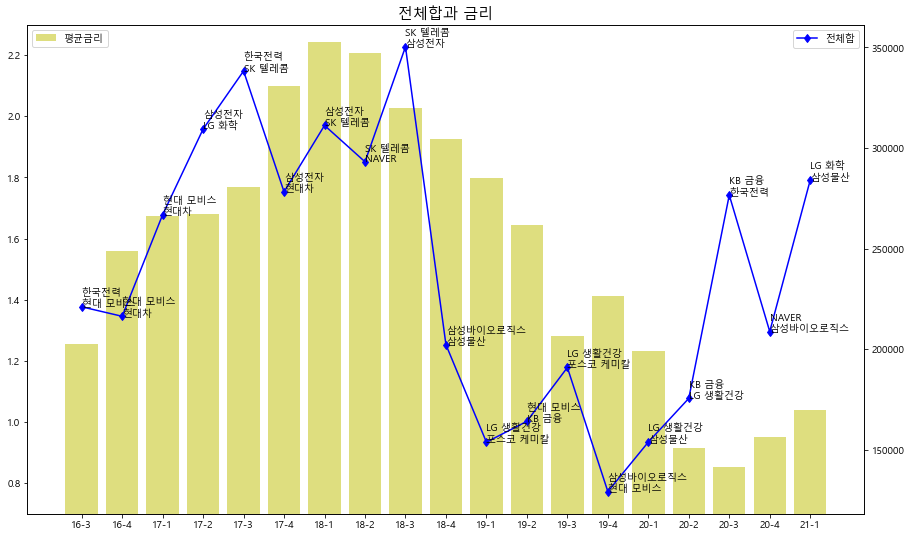

In [146]:
fig=plt.figure(figsize=(15,9))
ax=fig.add_subplot(111)
# plt.figure(figsize=(10,6))
ax.bar(df2.index,df2['평균금리'],label='평균금리',alpha=0.5,color='y')
plt.legend(loc='best')
ax.set_title('전체합과 금리', fontsize=15)
ax.set_ylim(0.7,2.3)
# ax.plot(df2.index,df2[df2.columns[12]],color='b',marker='d',label='전체합')
# ax.set_title('전체합과 금리', fontsize=15)
# for  n in range(19):
#     plt.text(df2.index[n],
#              df2[df2.columns[12]][n],
# #             df5['1st'][n],
#              z[n],
#             fontsize=10)
plt.legend(loc=2)
ax2=ax.twinx()
# plt.bar(df2.index,df2['평균금리'],label='평균금리',alpha=0.5,color='y')
# plt.legend(loc='best')
plt.plot(df2.index,df2[df2.columns[12]],color='b',marker='d',label='전체합')

for  n in range(19):
    plt.text(df2.index[n],
             df2[df2.columns[12]][n],
#             df5['1st'][n],
             dfzz['1st'][n][:-2]+'\n'+dfzz['2nd'][n][:-2],
            fontsize=10)
plt.legend(loc='best')
plt.savefig('호황업종on전체합_z값_금리.png')

In [115]:
df2['평균금리']

분기
16-3    1.253806
16-4    1.559797
17-1    1.673597
17-2    1.680133
17-3    1.768313
17-4    2.098397
18-1    2.243279
18-2    2.206133
18-3    2.028705
18-4    1.926873
19-1    1.799373
19-2    1.643290
19-3    1.280444
19-4    1.412698
20-1    1.234016
20-2    0.915967
20-3    0.853766
20-4    0.949806
21-1    1.038917
Name: 평균금리, dtype: float64

In [112]:
pearsonr(df2['평균금리'][:-3],df2['합'][:-3])

(0.6327330688949309, 0.008525630926347767)

In [ ]:
dfzz=